In [1]:
import cira 

cira.auth.KEY_FILE = "../../alpc_key.json"
assert cira.auth.check_keys(), "the set keys dose not work"

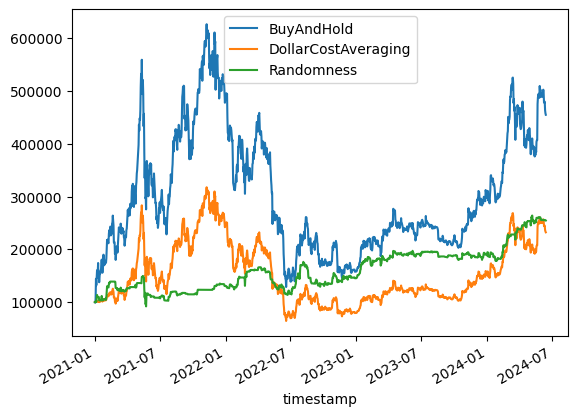

In [3]:
import cira
from datetime import datetime
import matplotlib.pyplot as plt

cira.auth.KEY_FILE = ""
assert not cira.auth.check_keys()

SYMBOL = "ETH/USD"
ast = cira.Cryptocurrency(SYMBOL)

data = ast.historical_data_df(datetime(2021, 1, 1), datetime.now().date())

strats = [
            cira.strategy.ByAndHold(),
            cira.strategy.DollarCostAveraging(0.8),
            cira.strategy.Randomness(-100, 100, seed=None, use_float=True),
        ]
cira.strategy.multi_strategy_backtest(strats, data, data["open"].to_frame(), 100_000).plot()
plt.savefig("./result.png")